## Supervised Learning with scikit-Learn


***
Classification and Regression: You discovered that supervised learning is divided into two main types: classification, which is used for predicting which category an observation falls into, and regression, for predicting a continuous value.
Preparing Data: The importance of preparing your data before training a model was emphasized. Data must be free of missing values, in numeric format, and stored properly using pandas DataFrames, Series, or NumPy arrays.
scikit-learn Workflow: You learned the general workflow for using scikit-learn to build a supervised learning model, which involves importing a model, fitting it to the data, and then making predictions. For example:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X, y)
predictions = model.predict(X_new)
Binary Classification: A specific focus was placed on binary classification, where you predict one of two possible outcomes, such as whether an email is spam or not.
***

In [42]:
#import kagglehub

#path = kagglehub.dataset_download("kundanbedmutha/exam-score-prediction-dataset", path=".")

#print("Path to dataset files:", path)

#### K-Nearest neighbors


In [43]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv("./Datasets/Exam_Score_Prediction.csv")
data.head()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


In [44]:
# Handle missing values by dropping rows with any NaN values
data = data.dropna()


In [45]:
#find the number of categories for each categorical column
print("gender: " ,data['gender'].value_counts() , '\n')
print("course: " ,data['course'].value_counts() , '\n')
print("internet_access" , data["internet_access"].value_counts() , '\n')
print("sleep_quality: " ,data['sleep_quality'].value_counts() , '\n')
print("study_method: " ,data['study_method'].value_counts() , '\n')
print("facility_rating: " ,data['facility_rating'].value_counts() , '\n')
print("exam_difficulty: " ,data['exam_difficulty'].value_counts())


gender:  gender
other     6726
male      6695
female    6579
Name: count, dtype: int64 

course:  course
bca        2902
ba         2896
b.sc       2878
b.com      2864
bba        2836
diploma    2826
b.tech     2798
Name: count, dtype: int64 

internet_access internet_access
yes    16988
no      3012
Name: count, dtype: int64 

sleep_quality:  sleep_quality
average    6694
poor       6687
good       6619
Name: count, dtype: int64 

study_method:  study_method
self-study       4079
online videos    4069
coaching         4036
group study      3922
mixed            3894
Name: count, dtype: int64 

facility_rating:  facility_rating
medium    6760
low       6638
high      6602
Name: count, dtype: int64 

exam_difficulty:  exam_difficulty
moderate    9878
easy        6141
hard        3981
Name: count, dtype: int64


In [46]:
#convert categorical data to numeric data
data['gender'] = data['gender'].map({'male': 0, 'female': 1, 'other': 2})
data['course'] = data['course'].map({'b.tech': 0, 'b.sc': 1, 'b.com': 2, 'ba': 3, 'bca': 4, 'bba': 5, 'diploma': 6})
data['internet_access'] = data['internet_access'].map({'yes': 1, 'no': 0})
data['sleep_quality'] = data['sleep_quality'].map({'poor': 0, 'average': 1, 'good': 2})
data['study_method'] = data['study_method'].replace({'self-study': 'self study'}).map({'self study': 0, 'group study': 1, 'online videos': 2, 'coaching': 3, 'mixed': 4})
data['facility_rating'] = data['facility_rating'].map({'low': 0, 'medium': 1, 'high': 2})
data['exam_difficulty'] = data['exam_difficulty'].map({'easy': 0, 'moderate': 1, 'hard': 2})

data.head()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,0,6,2.78,92.9,1,7.4,0,3,0,2,58.9
1,2,23,2,4,3.37,64.8,1,4.6,1,2,1,1,54.8
2,3,22,0,1,7.88,76.8,1,8.5,0,3,2,1,90.3
3,4,20,2,6,0.67,48.4,1,5.8,1,2,0,1,29.7
4,5,20,1,6,0.89,71.6,1,9.8,0,3,0,1,43.7


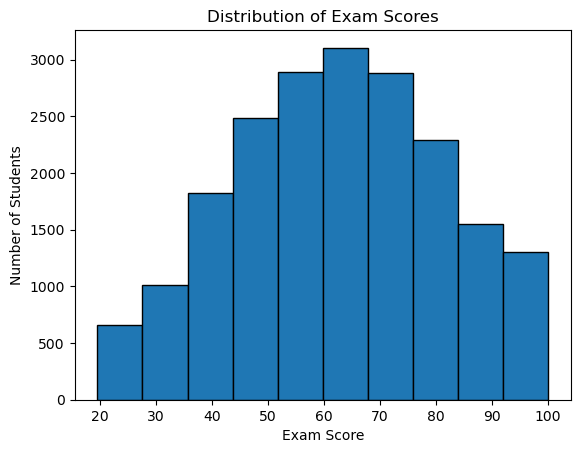

In [47]:
# visualize the distribution of exam scores
plt.hist(data['exam_score'], bins=10, edgecolor='black')
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Number of Students')
plt.show()

In [48]:
# put all data except the predected column and id column into x and the predicted column into y
x = data.values[:, 1:-1]


# make y a classification problem by converting scores into pass/fail (pass if score >= 40, fail otherwise)
y = data.values[:, -1]
y = np.where(y >= 40, 1, 0)




print(x.shape , y.shape)

(20000, 11) (20000,)


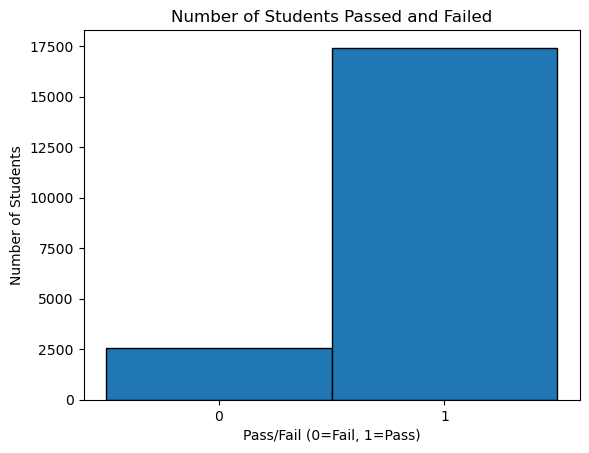

In [49]:
# visualize the number of students who passed and failed
plt.hist(y, bins=[-0.5, 0.5, 1.5], edgecolor='black')
plt.title('Number of Students Passed and Failed')
plt.xlabel('Pass/Fail (0=Fail, 1=Pass)')
plt.ylabel('Number of Students')
plt.xticks([0, 1])
plt.show()

In [50]:
#K-Nearest Neighbors with 15 neighbors (finds the 15 closest data points to make a prediction)
#Fitting the model with data, this puts the data into memory for future predictions
knn  = KNeighborsClassifier(n_neighbors=15) 
knn.fit(x, y)

# age , gender , course , study_hours , class_attendance , internet_access , sleep_hours , sleep_quality , study_method , facility_rating , exam_difficulty
x_new = np.array([[19 , 0 , 0 , 11, data['class_attendance'].mean() , 1 , 8 , 2 , 1 , 1 , 1],
                    [22 , 1 , 2 , 6 , data['class_attendance'].mean() , 0 , 5 , 0 , 0 , 0 , 2],
                    [20 , 1 , 1 , 9 , data['class_attendance'].mean() + data['class_attendance'].std() , 1 , 7 , 1 , 2 , 2 , 0],
                    [18 , 0 , 3 , 1 , data['class_attendance'].mean() - data['class_attendance'].std() , 0 , 3 , 0 , 3 , 1 , 2]
                  ])
prediction = knn.predict(x_new)
print("Predicted exam score:", prediction)

print("\nPredictions:")
for i in range(len(x_new)):
    result = "Pass" if prediction[i] == 1 else "Fail"
    print(f"Student {i+1}: {result}")

Predicted exam score: [1 1 1 0]

Predictions:
Student 1: Pass
Student 2: Pass
Student 3: Pass
Student 4: Fail
